## 1.Problem Understanding

1.1.Project Overview

1.2. Objective definition.

- The project aims to build binary classifer to predict whether a customer will 'soon' churn-stop doing business with Syria Tel. The target variable is churn(1=customer churns/leaves, 0=customer stays).

- The goal is to identfify the risk early and minimize revenue loss from churn since acquiring new customers is expensive compared to retaining the ones the company aalready has.

- The department that will mainly benefit from this information will be the management as well as the marketing company of SyriaTel, who can use the data from the model to bring aboit targeted interventions like offers, improved service and other things to curb churning.

1.3. Loading Libraries.

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix

In [223]:
# Loading the dataframe.
df= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


1.4. Data Inspection

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [225]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

- The data has 3,333 rows and 21 columns in total. The data has 16 numeric columns and 4 categorical columns.

- The data has the follwoing columns: state', 'account length', 'area code', 'phone number',
'international plan', 'voice mail plan', 'number vmail messages','total day minutes', 'total day calls', 'total day charge','total eve minutes', 'total eve calls', 'total eve charge','total night minutes', 'total night calls', 'total night charge','total intl minutes', 'total intl calls', 'total intl charge','customer service calls', 'churn'.

- The data also has no missing values as all the columns are filled.

The data also has no missing values as all the columns are filled.

## 2.Data Understanding(EDA)

In [226]:
# correlation before
numeric_columns = ['number vmail messages',
'total day minutes', 'total day calls','total eve minutes', 'total day charge',
'total eve calls','total night minutes', 'total night calls','total eve charge',
'total intl minutes', 'total intl calls','customer service calls','total night charge',
'total intl charge']

<Axes: >

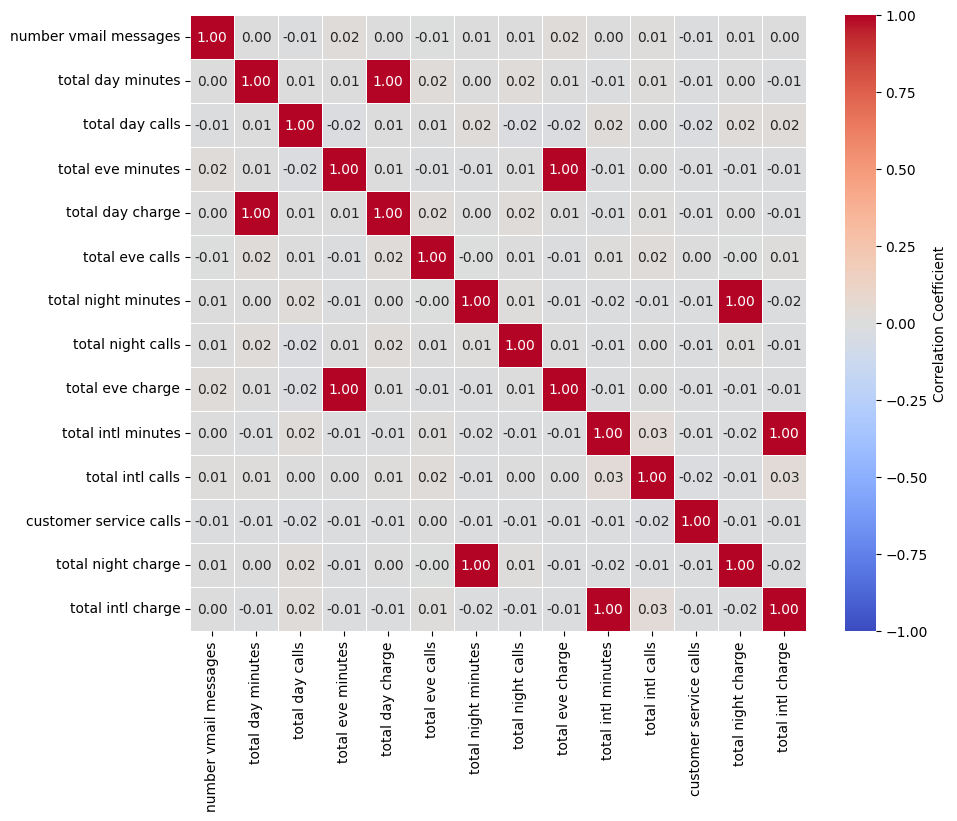

In [227]:
numeric_df = df[numeric_columns]

#calculating correlation matrix
corr_matrix_before = numeric_df.corr()

plt.figure(figsize=(10,8))   # to adjust size

sns.heatmap(
    corr_matrix_before,
    annot=True,
    fmt='.2f',
    cmap= 'coolwarm',
    vmin=-1,vmax=1,
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

- The anbove shows the correlation heat map for all the columns. Clearly from the heatmap, there are some columns which have a very weak correlation and therefore will not add any value to the model. For example, area code,account length,total day charge,total eve charge,total night charge,total intl charge. These columns are going to be dropped.

- For the categorical columns, two columns are dropped, phone number and state.

In [228]:
useless_columns = ["phone number","state", "area code","account length","total day charge","total eve charge","total night charge","total intl charge"]
df = df.drop(columns=useless_columns,errors='ignore')

In [229]:
# Identifying the numerical and categorical columns
numeric_columns = ['number vmail messages',
'total day minutes', 'total day calls','total eve minutes', 'total eve calls','total night minutes', 'total night calls','total intl minutes', 'total intl calls','customer service calls']

categorical_columns = ['international plan','voice mail plan']

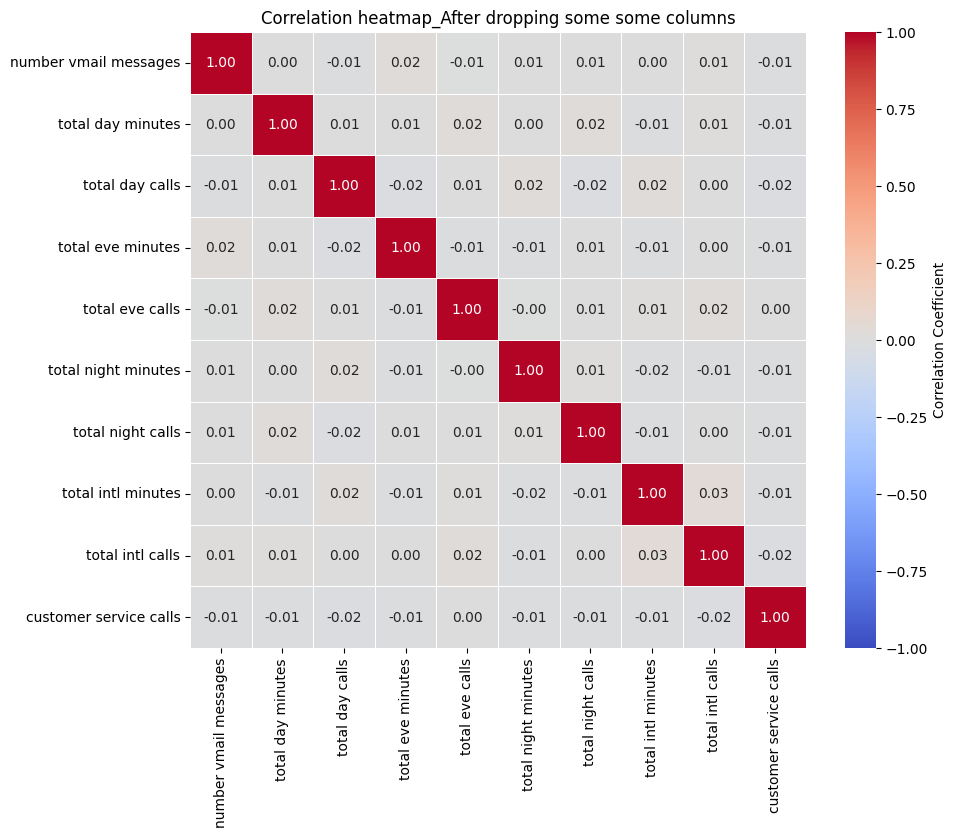

In [230]:
# Creating a correlation heatmap
numeric_df = df[numeric_columns]

#calculating correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,8))   # to adjust size

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap= 'coolwarm',
    vmin=-1,vmax=1,
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title('Correlation heatmap_After dropping some some columns')
plt.show()

- From the heat map, the columns , there are columns with very strong correlation.  For example, total day minutes, total evening minutes, total night minute, and total international minutes.

- To also avoid multicollinarity, we will drop one column fro each pair to reduce multicllinearity.

- The columns to be dropped will be,total day charge, total evening charge, total night charge, and total international charge
- The heatmap after dropping some columns has not reduced the multicollinearity that was there before.
- Although dropping the columns might not do alot for the model since the columns were mainly redudant.

In [231]:
# Separating target and predictors

#Target
y = df["churn"].copy()

#Features
X = df.drop(columns="churn")


## 3.Train-Test Split

3.1.Splitting the data into train and test

In [232]:
# Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.3)

In [233]:
print("X_train Shape:", X_train.shape)

X_train Shape: (2333, 12)


In [234]:
print("X_test Shape:", X_test.shape)

X_test Shape: (1000, 12)


In [235]:
# Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ("num",StandardScaler(),numeric_columns),
        ("cat",OneHotEncoder(drop='first',handle_unknown='ignore'),categorical_columns)
    
    ])

In [236]:
X_train_processed = preprocessor.fit_transform(X_train)

In [237]:
X_test_processed = preprocessor.transform(X_test)

## 4.Model Building

Baseline Model : Logistic Regression

In [238]:
# Logistic Regression

#Create the first Instance of Logistic Regression
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train_processed,y_train)

# Evaluating the model
y_pred_logreg = logreg.predict(X_test_processed)

## 5.Model Evaluation
- In this step, we will get the actuak performance numbers for each score(recall, f1 score, accuracy and precision)

In [239]:
recall_logreg = recall_score(y_test,y_pred_logreg)
precision_logreg = precision_score(y_test,y_pred_logreg)
f1_score_logreg = f1_score(y_test,y_pred_logreg)
accuracy_logreg = accuracy_score(y_test,y_pred_logreg)

recall_logreg, precision_logreg,f1_score_logreg,accuracy_logreg

(0.21678321678321677, 0.5740740740740741, 0.3147208121827411, 0.865)

In [240]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_logreg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_logreg))

              precision    recall  f1-score   support

       False       0.88      0.97      0.93       857
        True       0.57      0.22      0.31       143

    accuracy                           0.86      1000
   macro avg       0.73      0.59      0.62      1000
weighted avg       0.84      0.86      0.84      1000


Confusion Matrix:
[[834  23]
 [112  31]]


We now have our performamce score and  classification report for our firt model.

- For our Churn=1, all the performance metrics scores are low. For examplem the precision is 57%, a bit moderate.

- Recall is only 22% meaning that our model misses to catch 78% of the churnes(customers who will eventally leave SyriaTel)

- F1-score is also abit low.

- Acuuracy is 86% however the data has class Imbalance.

Model 2: Tuned Logistic Regression

In [250]:
# Tued Logistic Regression

#Create the first Instance of Logistic Regression
logreg_tuned = LogisticRegression(C=10,max_iter=1000,random_state=42)

# fit the model
logreg_tuned.fit(X_train_processed,y_train)

# Evaluating the model
y_pred_logreg_tuned = logreg_tuned.predict(X_test_processed)

In [242]:
recall_logreg_tuned = recall_score(y_test,y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test,y_pred_logreg_tuned)
f1_score_logreg_tuned= f1_score(y_test,y_pred_logreg_tuned)
accuracy_logreg_tuned= accuracy_score(y_test,y_pred_logreg_tuned)

recall_logreg_tuned, precision_logreg_tuned,f1_score_logreg_tuned,accuracy_logreg_tuned

(0.21678321678321677, 0.5740740740740741, 0.3147208121827411, 0.865)

In [243]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_logreg_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_logreg_tuned))

              precision    recall  f1-score   support

       False       0.88      0.97      0.93       857
        True       0.57      0.22      0.31       143

    accuracy                           0.86      1000
   macro avg       0.73      0.59      0.62      1000
weighted avg       0.84      0.86      0.84      1000


Confusion Matrix:
[[834  23]
 [112  31]]


There is a very small improvement in performance values between my baseline Logistic Regression model and the tuned Logistic Regression.

Model 3: Decision Tree Classifier

In [244]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_processed,y_train)

# predictions
y_pred_dt = dt.predict(X_test_processed)

In [245]:
# Evaluating our dt model
recall_dt = recall_score(y_test,y_pred_dt)
precision_dt = precision_score(y_test,y_pred_dt)
f1_score_dt= f1_score(y_test,y_pred_dt)
accuracy_dt= accuracy_score(y_test,y_pred_dt)

recall_dt, precision_dt,f1_score_dt,accuracy_dt

(0.7132867132867133, 0.7083333333333334, 0.710801393728223, 0.917)

In [246]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_dt))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_dt))

              precision    recall  f1-score   support

       False       0.95      0.95      0.95       857
        True       0.71      0.71      0.71       143

    accuracy                           0.92      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.92      0.92      0.92      1000


Confusion Matrix:
[[815  42]
 [ 41 102]]


In [247]:
dt_tuned = DecisionTreeClassifier(
    criterion= 'gini',
    splitter ='best',
    max_depth=6,
    min_samples_split = 12,
    min_samples_leaf = 15,
    random_state=42,
    class_weight = 'balanced',
    max_features = None,

)

dt_tuned.fit(X_train_processed, y_train)

y_pred_dt_tuned = dt_tuned.predict(X_test_processed)

In [248]:
# Evaluating the tuned Decision Tree Model
recall_dt_tuned = recall_score(y_test,y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test,y_pred_dt_tuned)
f1_score_dt_tuned= f1_score(y_test,y_pred_dt_tuned)
accuracy_dt_tuned= accuracy_score(y_test,y_pred_dt_tuned)

recall_dt_tuned, precision_dt_tuned,f1_score_dt_tuned,accuracy_dt_tuned

(0.7972027972027972, 0.6826347305389222, 0.7354838709677419, 0.918)

In [249]:
# Printing the classificiation report
print(classification_report(y_test,y_pred_dt_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred_dt_tuned))

              precision    recall  f1-score   support

       False       0.97      0.94      0.95       857
        True       0.68      0.80      0.74       143

    accuracy                           0.92      1000
   macro avg       0.82      0.87      0.84      1000
weighted avg       0.92      0.92      0.92      1000


Confusion Matrix:
[[804  53]
 [ 29 114]]


Evaluate confusion matrix, ROC CURVE AND THRESHOLD TUNING

## 6.Model Improvement

## 7.Final Modelling Selection

## 8.Conclusion and Business Improvement